# Part 1


### Apply PCA to breast cancer dataset and visualize 2 principle components.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.shape=  (569, 30)
y.shape=  (569,)


In [3]:
pca = PCA(n_components=10)
pca.fit(X_scaled)

print("Eigenvalues:")
print(pca.explained_variance_, "\n")

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100, "\n")

print("EigenVectors")
print(pca.components_)

Eigenvalues:
[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888  0.47745625  0.41762878  0.35131087] 

Variances (Percentage):
[44.27202561 18.97118204  9.39316326  6.60213492  5.49576849  4.02452204
  2.25073371  1.5887238   1.38964937  1.16897819] 

EigenVectors
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.

In [4]:
print(sum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

0.9515688143321157


array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

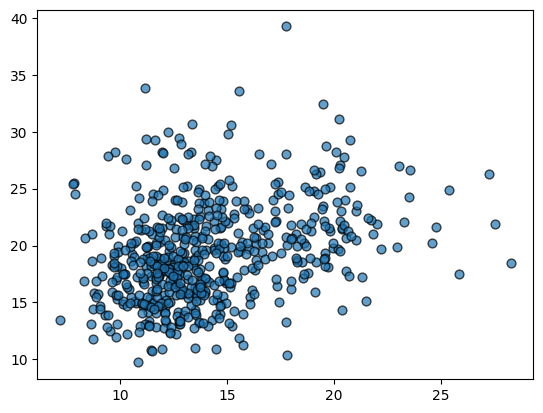

In [5]:
Z = pca.fit_transform(X)

# eigen_vecors= pca.components_ 
# X_approximate = Z @ eigen_vecors
X_approximate = pca.inverse_transform(Z)

plt.figure()
plt.scatter(X_approximate[:,0], X_approximate[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)


# Part 2

### Mine top 10 association rules worth recommending for Groceries dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [7]:
df = pd.read_csv('Groceries_dataset.csv')
print(df.to_string())

       Member_number        Date            itemDescription
0               1808  21-07-2015             tropical fruit
1               2552  05-01-2015                 whole milk
2               2300  19-09-2015                  pip fruit
3               1187  12-12-2015           other vegetables
4               3037  01-02-2015                 whole milk
5               4941  14-02-2015                 rolls/buns
6               4501  08-05-2015           other vegetables
7               3803  23-12-2015                 pot plants
8               2762  20-03-2015                 whole milk
9               4119  12-02-2015             tropical fruit
10              1340  24-02-2015               citrus fruit
11              2193  14-04-2015                       beef
12              1997  21-07-2015                frankfurter
13              4546  03-09-2015                    chicken
14              4736  21-07-2015                     butter
15              1959  30-03-2015      fr

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

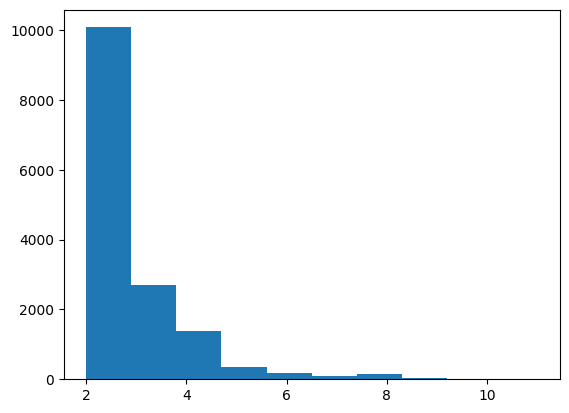

In [8]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [9]:
prod = df.iloc[:, 2]
print(prod.to_string())

0                   tropical fruit
1                       whole milk
2                        pip fruit
3                 other vegetables
4                       whole milk
5                       rolls/buns
6                 other vegetables
7                       pot plants
8                       whole milk
9                   tropical fruit
10                    citrus fruit
11                            beef
12                     frankfurter
13                         chicken
14                          butter
15           fruit/vegetable juice
16       packaged fruit/vegetables
17                       chocolate
18                   specialty bar
19                other vegetables
20                     butter milk
21                      whole milk
22                  tropical fruit
23                  tropical fruit
24                   bottled water
25                          yogurt
26                         sausage
27                other vegetables
28                  

In [10]:
prod_stripped = []

for i in prod:
    prod_stripped.append(i.split("/"))

prod_stripped

[['tropical fruit'],
 ['whole milk'],
 ['pip fruit'],
 ['other vegetables'],
 ['whole milk'],
 ['rolls', 'buns'],
 ['other vegetables'],
 ['pot plants'],
 ['whole milk'],
 ['tropical fruit'],
 ['citrus fruit'],
 ['beef'],
 ['frankfurter'],
 ['chicken'],
 ['butter'],
 ['fruit', 'vegetable juice'],
 ['packaged fruit', 'vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk'],
 ['whole milk'],
 ['tropical fruit'],
 ['tropical fruit'],
 ['bottled water'],
 ['yogurt'],
 ['sausage'],
 ['other vegetables'],
 ['brown bread'],
 ['yogurt'],
 ['hamburger meat'],
 ['root vegetables'],
 ['pork'],
 ['beef'],
 ['pastry'],
 ['fruit', 'vegetable juice'],
 ['canned beer'],
 ['root vegetables'],
 ['citrus fruit'],
 ['sausage'],
 ['tropical fruit'],
 ['berries'],
 ['canned beer'],
 ['butter milk'],
 ['coffee'],
 ['pastry'],
 ['rolls', 'buns'],
 ['misc. beverages'],
 ['root vegetables'],
 ['sausage'],
 ['canned beer'],
 ['ham'],
 ['turkey'],
 ['whole milk'],
 ['whole milk']

In [11]:
rules = list(apriori(prod_stripped, min_support = 0.003, min_confidence = 0.2, min_lift = 4, min_length = 2))
rules

[RelationRecord(items=frozenset({'red', 'blush wine'}), support=0.004050045143815298, ordered_statistics=[OrderedStatistic(items_base=frozenset({'blush wine'}), items_add=frozenset({'red'}), confidence=1.0, lift=246.91082802547768), OrderedStatistic(items_base=frozenset({'red'}), items_add=frozenset({'blush wine'}), confidence=1.0, lift=246.91082802547768)]),
 RelationRecord(items=frozenset({'buns', 'rolls'}), support=0.04426673545724236, ordered_statistics=[OrderedStatistic(items_base=frozenset({'buns'}), items_add=frozenset({'rolls'}), confidence=1.0, lift=22.590326340326342), OrderedStatistic(items_base=frozenset({'rolls'}), items_add=frozenset({'buns'}), confidence=1.0, lift=22.590326340326342)]),
 RelationRecord(items=frozenset({'fruit', 'vegetable juice'}), support=0.013362569328002064, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fruit'}), items_add=frozenset({'vegetable juice'}), confidence=1.0, lift=74.83590733590734), OrderedStatistic(items_base=frozenset({'veg

In [12]:
len(rules)

5

In [13]:
def print_rules(rules):
    for rule in rules:
        print ('rule.items=', list(rule.items))
        print ('rule.support=',rule.support)

        for os in rule.ordered_statistics:
            print ('\titems_base=', list(os.items_base))
            print ('\tlifted_item =', list(os.items_add))
            print ('\tlift=', os.lift)
            print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print ('\n')
        
print_rules(rules)

rule.items= ['red', 'blush wine']
rule.support= 0.004050045143815298
	items_base= ['blush wine']
	lifted_item = ['red']
	lift= 246.91082802547768
	confidence (i.e. cond prob ['red'] if ['blush wine'])= 1.0


	items_base= ['red']
	lifted_item = ['blush wine']
	lift= 246.91082802547768
	confidence (i.e. cond prob ['blush wine'] if ['red'])= 1.0


rule.items= ['buns', 'rolls']
rule.support= 0.04426673545724236
	items_base= ['buns']
	lifted_item = ['rolls']
	lift= 22.590326340326342
	confidence (i.e. cond prob ['rolls'] if ['buns'])= 1.0


	items_base= ['rolls']
	lifted_item = ['buns']
	lift= 22.590326340326342
	confidence (i.e. cond prob ['buns'] if ['rolls'])= 1.0


rule.items= ['fruit', 'vegetable juice']
rule.support= 0.013362569328002064
	items_base= ['fruit']
	lifted_item = ['vegetable juice']
	lift= 74.83590733590734
	confidence (i.e. cond prob ['vegetable juice'] if ['fruit'])= 1.0


	items_base= ['vegetable juice']
	lifted_item = ['fruit']
	lift= 74.83590733590734
	confidence (i.e